# Lambda GC exploration

In [1]:
data <- read.table(gzfile("~/UKBiobank/results/REGENIE_results/results_imputed_data/2021_10_13_f2257_300K/100521_UKBB_Hearing_noise_f2257_expandedwhite_95794cases_141007ctrl_300k_PC1_PC2_f2257.regenie.snp_stats_original_columns.gz"), sep='\t', header=T)

In [3]:
head(sumstat)

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,13259,rs562993331,A,G,0.999763,0.838834,236801,ADD,-0.1158700,0.214576,0.2915960,0.229738,NA
2,1,17569,rs535086049,A,C,0.999990,0.848208,236801,ADD,-0.3124920,1.012530,0.0952505,0.120557,NA
3,1,17641,rs578081284,A,G,0.999187,0.853282,236801,ADD,0.0363263,0.115344,0.0991857,0.123315,NA
4,1,30741,rs558169846,A,C,0.999972,0.905336,236801,ADD,0.2097840,0.616039,0.1159660,0.134629,NA
5,1,57222,rs576081345,C,T,0.999394,0.836319,236801,ADD,0.0391127,0.134304,0.0848117,0.113013,NA
6,1,58396,rs570371753,C,T,0.999751,0.989304,236801,ADD,-0.2297670,0.191321,1.4422900,0.638707,NA


In [5]:
counts <- table(sumstat$A1FREQ)

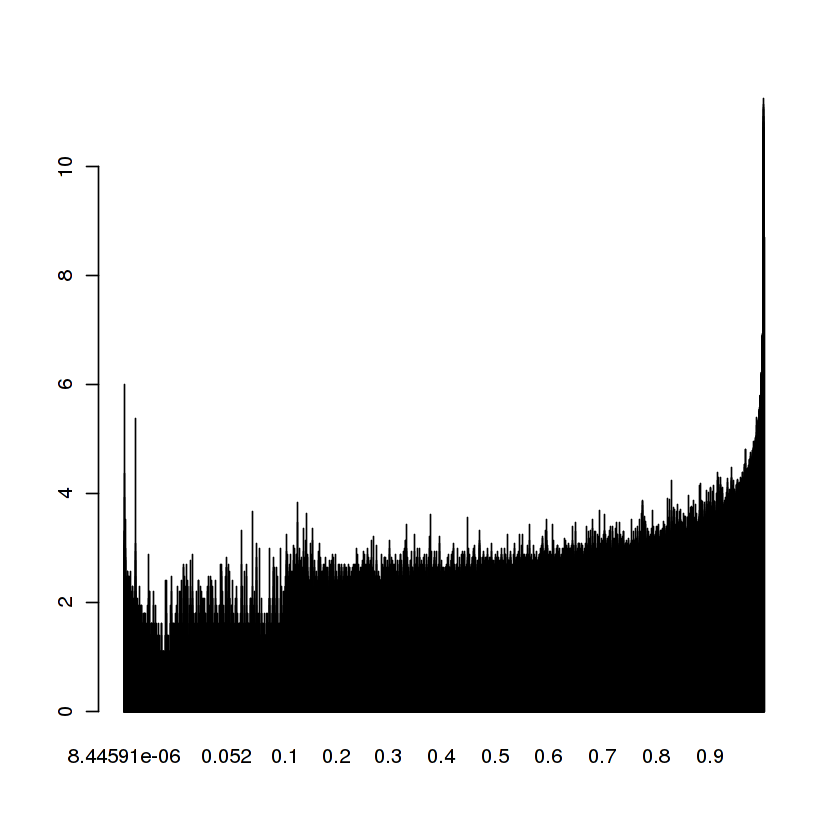

In [7]:
barplot(log(counts))

In [15]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [14]:
d<-data.frame(sumstat)
ggplot(data=d, aes(x=A1FREQ,y=N)) + 
    geom_bar(stat="identity") +
    scale_y_log10()

In [37]:
df <- sumstat %>% 
  mutate(MAF = if_else(A1FREQ > 0.5 , 1 - A1FREQ, A1FREQ)) %>%
  mutate(P= 10^-LOG10P ) %>%
  mutate(logMAF = round(log10(MAF),2))

In [38]:
head(df)

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,MAF,P,logMAF
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
1,1,13259,rs562993331,A,G,0.999763,0.838834,236801,ADD,-0.1158700,0.214576,0.2915960,0.229738,NA,0.000237,0.5891990,-3.63
2,1,17569,rs535086049,A,C,0.999990,0.848208,236801,ADD,-0.3124920,1.012530,0.0952505,0.120557,NA,0.000010,0.7576053,-5.00
3,1,17641,rs578081284,A,G,0.999187,0.853282,236801,ADD,0.0363263,0.115344,0.0991857,0.123315,NA,0.000813,0.7528093,-3.09
4,1,30741,rs558169846,A,C,0.999972,0.905336,236801,ADD,0.2097840,0.616039,0.1159660,0.134629,NA,0.000028,0.7334508,-4.55
5,1,57222,rs576081345,C,T,0.999394,0.836319,236801,ADD,0.0391127,0.134304,0.0848117,0.113013,NA,0.000606,0.7708804,-3.22
6,1,58396,rs570371753,C,T,0.999751,0.989304,236801,ADD,-0.2297670,0.191321,1.4422900,0.638707,NA,0.000249,0.2297698,-3.60


In [40]:
MAF_count  <- table(df$logMAF)

In [41]:
MAF_count


  -5.1  -5.07  -5.06  -5.05  -5.04  -5.03  -5.02  -5.01     -5  -4.99  -4.98 
  6001     19     28  77549     29     45     31     24  63646     29     58 
 -4.97  -4.96  -4.95  -4.94  -4.93  -4.92  -4.91   -4.9  -4.89  -4.88  -4.87 
    50  69045     45     41     54  55364     41     93  65215     69     63 
 -4.86  -4.85  -4.84  -4.83  -4.82  -4.81   -4.8  -4.79  -4.78  -4.77  -4.76 
    78  50010     58    701  55349     89  49238     99     88  50531     72 
 -4.75  -4.74  -4.73  -4.72  -4.71   -4.7  -4.69  -4.68  -4.67  -4.66  -4.65 
    86  45717     79  45718    118  43237     80  43275     91  41534     82 
 -4.64  -4.63  -4.62  -4.61   -4.6  -4.59  -4.58  -4.57  -4.56  -4.55  -4.54 
 40293     90  40327    122  39113  40051     59  37321    113  37869  35705 
 -4.53  -4.52  -4.51   -4.5  -4.49  -4.48  -4.47  -4.46  -4.45  -4.44  -4.43 
   174  36782  34439    146  36076  33723  34782  32909    132  33191  31770 
 -4.42  -4.41   -4.4  -4.39  -4.38  -4.37  -4.36  -4.35  -4.34 

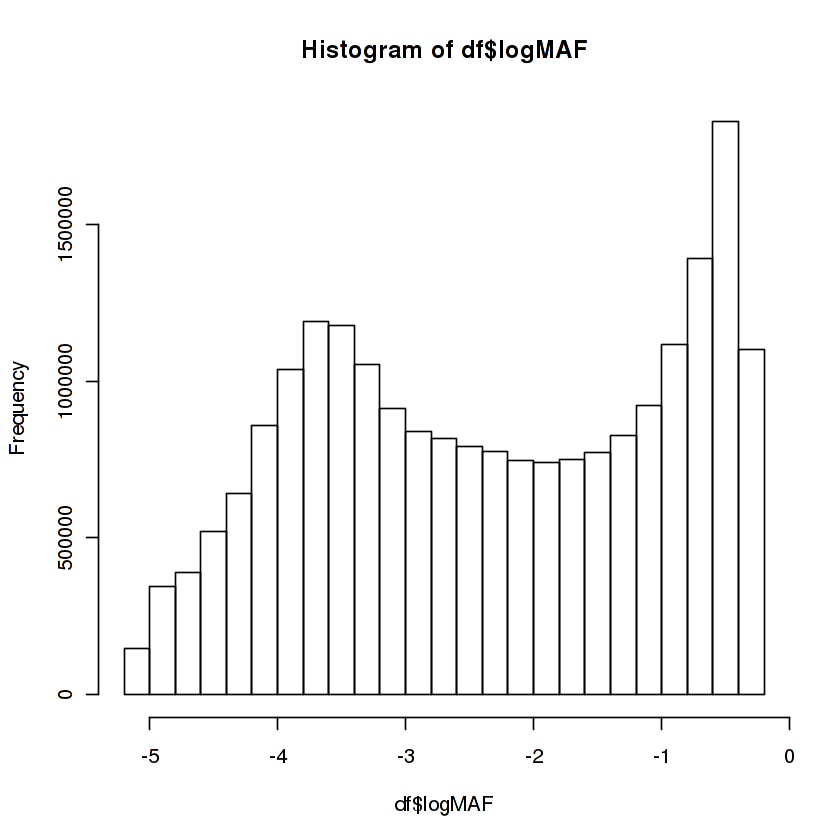

In [42]:
hist(df$logMAF)

In [ ]:
lambda <- median(qchisq(1-data$${pval},1), na.rm=TRUE)/qchisq(0.5,1)

In [45]:
df1 <- transform(df, group=cut(logMAF,  breaks=seq(0,-6,-0.5)))

In [46]:
head(df1)

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,MAF,P,logMAF,group
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,13259,rs562993331,A,G,0.999763,0.838834,236801,ADD,-0.1158700,0.214576,0.2915960,0.229738,NA,0.000237,0.5891990,-3.63,"(-4,-3.5]"
2,1,17569,rs535086049,A,C,0.999990,0.848208,236801,ADD,-0.3124920,1.012530,0.0952505,0.120557,NA,0.000010,0.7576053,-5.00,"(-5.5,-5]"
3,1,17641,rs578081284,A,G,0.999187,0.853282,236801,ADD,0.0363263,0.115344,0.0991857,0.123315,NA,0.000813,0.7528093,-3.09,"(-3.5,-3]"
4,1,30741,rs558169846,A,C,0.999972,0.905336,236801,ADD,0.2097840,0.616039,0.1159660,0.134629,NA,0.000028,0.7334508,-4.55,"(-5,-4.5]"
5,1,57222,rs576081345,C,T,0.999394,0.836319,236801,ADD,0.0391127,0.134304,0.0848117,0.113013,NA,0.000606,0.7708804,-3.22,"(-3.5,-3]"
6,1,58396,rs570371753,C,T,0.999751,0.989304,236801,ADD,-0.2297670,0.191321,1.4422900,0.638707,NA,0.000249,0.2297698,-3.60,"(-4,-3.5]"


In [47]:
res <- do.call(data.frame,aggregate(cbind(P)~group, df1, 
       FUN=function(x) c(Count=length(x), lambda=(median(qchisq(1-df$P,1), na.rm=TRUE)/qchisq(0.5,1)))))

In [50]:
res

group,P.Count,P.lambda
<fct>,<dbl>,<dbl>
"(-5.5,-5]",147372,0.9613574
"(-5,-4.5]",959101,1.0842357
"(-4.5,-4]",1799518,1.0175133
"(-4,-3.5]",2820563,1.0042085
"(-3.5,-3]",2548060,1.0166009
"(-3,-2.5]",2054987,1.0205652
"(-2.5,-2]",1914455,1.0446483
"(-2,-1.5]",1864233,1.0671056
"(-1.5,-1]",2144146,1.1665156


In [49]:
lambda <- (median(qchisq(1-df$P,1), na.rm=TRUE)/qchisq(0.5,1))

In [2]:
library('dplyr')
#file<-"~/UKBiobank/results/REGENIE_results/results_imputed_data/2021_10_13_f2257_300K/100521_UKBB_Hearing_noise_f2257_expandedwhite_95794cases_141007ctrl_300k_PC1_PC2_f2257.regenie.snp_stats_original_columns.gz"
data<-read.table(gzfile("~/UKBiobank/results/REGENIE_results/results_imputed_data/2021_10_13_f2257_300K/100521_UKBB_Hearing_noise_f2257_expandedwhite_95794cases_141007ctrl_300k_PC1_PC2_f2257.regenie.snp_stats_original_columns.gz"),sep="\t",header=TRUE)

In [2]:
df <- data %>% 
  mutate(MAF = if_else(A1FREQ > 0.5 , 1 - A1FREQ, A1FREQ)) %>%
  mutate(P= 10^-LOG10P ) %>%
  mutate(logMAF = round(log10(MAF),2))
df1 <- transform(df, group=cut(logMAF,  breaks=seq(round(min(df$logMAF))-0.5,0,0.5)))
res <- do.call(data.frame,aggregate(cbind(P)~group, df1, 
       FUN=function(x) c(Count=length(x), lambda=(median(qchisq(1-x,1), na.rm=TRUE)/qchisq(0.5,1)))))
res$pos<-seq(round(min(df$logMAF))-0.25,0,0.5)
                                    

ERROR: Error in UseMethod("mutate"): no applicable method for 'mutate' applied to an object of class "function"


In [ ]:
# Plot
hist(df$logMAF,breaks=seq(round(min(df$logMAF))-0.5,0,0.5),xaxt="n",xlab="logMAF",ylab="variant count",main="")
axis(1, at=seq(round(min(df$logMAF))-0.5,0,0.5),labels=seq(round(min(df$logMAF))-0.5,0,0.5))
par(new = TRUE)
plot(res$pos,res$P.lambda,type="l",axes = FALSE, xlab = "", ylab = "",yaxt="n",ylim=c(0,1.5))
axis(side = 4, at = seq(0,1.5,0.5))
mtext("lambda gc", side = 4, cex.lab=2,line=1) 
abline(h=1,lty=2,col="red")